# Introduction

Notebook to aggregate the running of models in the context of traceability between features and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np

from modules.models_runner.feat_br_runner import Feat_BR_Runner
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Union Strategy

In [2]:
runner_1 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

lsi_model_1, lsi_eval_1 = runner_1.run_lsi_model()
lda_model_1, lda_eval_1 = runner_1.run_lda_model()
bm25_model_1, bm25_eval_1 = runner_1.run_bm25_model()
w2v_model_1, w2v_eval_1 = runner_1.run_word2vec_model()

Expert and Volunteers Matrix UNION.shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [3]:
results_1 = aux_functions.compile_results({'lsi_model':lsi_model_1,'lda_model':lda_model_1,'bm25_model':bm25_model_1,'w2v_model':w2v_model_1,
                                         'lsi_eval':lsi_eval_1, 'lda_eval':lda_eval_1, 'bm25_eval':bm25_eval_1, 'w2v_eval':w2v_eval_1})
results_1.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.107527,0.087366,0.091995,10.752688,8.736559,9.199522
1,LDA_Model_Feat_BR,0.126152,0.506541,0.187834,12.615207,50.654122,18.783367
2,BM25_Model_Feat_BR,0.069124,0.849462,0.123880,6.912442,84.946237,12.388044
3,WordVec_Model_Feat_BR,0.078381,0.683423,0.134280,7.838098,68.342294,13.427973


### Plots

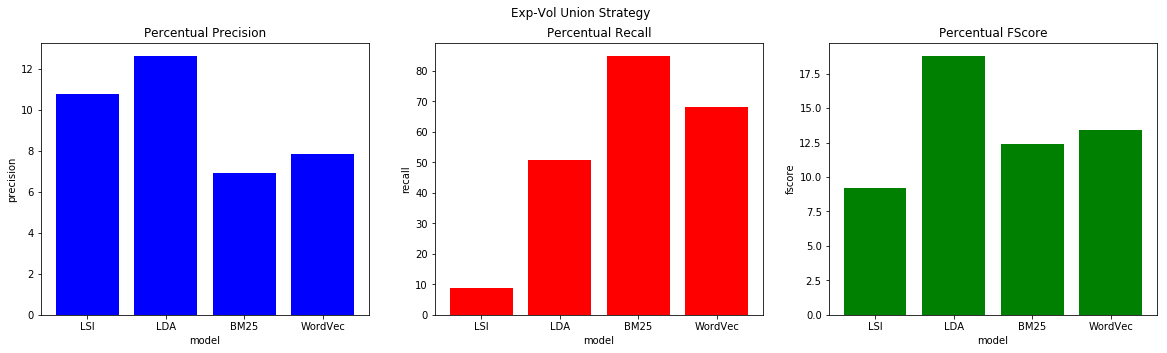

In [4]:
aux_functions.plot_results(results_1, title='Exp-Vol Union Strategy')

## Intersec Strategy

In [5]:
runner_2 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)

lsi_model_2, lsi_eval_2 = runner_2.run_lsi_model()
lda_model_2, lda_eval_2 = runner_2.run_lda_model()
bm25_model_2, bm25_eval_2 = runner_2.run_bm25_model()
w2v_model_2, w2v_eval_2 = runner_2.run_word2vec_model()

Expert and Volunteers Matrix INTERSEC.shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [6]:
results_2 = aux_functions.compile_results({'lsi_model':lsi_model_2,'lda_model':lda_model_2,'bm25_model':bm25_model_2,'w2v_model':w2v_model_2,
                                         'lsi_eval':lsi_eval_2, 'lda_eval':lda_eval_2, 'bm25_eval':bm25_eval_2, 'w2v_eval':w2v_eval_2})
results_2.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.075269,0.075269,0.075269,7.526882,7.526882,7.526882
1,LDA_Model_Feat_BR,0.048963,0.279570,0.077658,4.896313,27.956989,7.765830
2,BM25_Model_Feat_BR,0.022017,0.462366,0.042033,2.201741,46.236559,4.203324
3,WordVec_Model_Feat_BR,0.028029,0.376344,0.051811,2.802919,37.634409,5.181129


### Plots

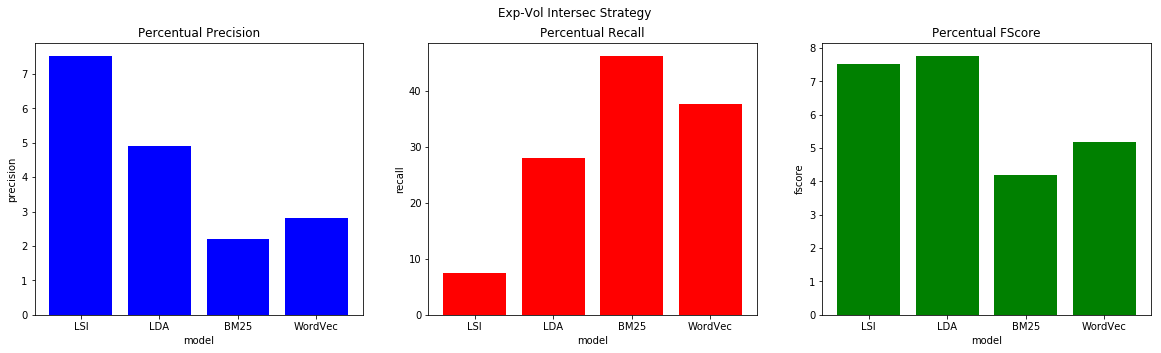

In [7]:
aux_functions.plot_results(results_2, title='Exp-Vol Intersec Strategy')

## Expert Only Strategy

In [8]:
runner_3 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)

lsi_model_3, lsi_eval_3 = runner_3.run_lsi_model()
lda_model_3, lda_eval_3 = runner_3.run_lda_model()
bm25_model_3, bm25_eval_3 = runner_3.run_bm25_model()
w2v_model_3, w2v_eval_3 = runner_3.run_word2vec_model()

Expert Matrix shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [9]:
results_3 = aux_functions.compile_results({'lsi_model':lsi_model_3,'lda_model':lda_model_3,'bm25_model':bm25_model_3,'w2v_model':w2v_model_3,
                                         'lsi_eval':lsi_eval_3, 'lda_eval':lda_eval_3, 'bm25_eval':bm25_eval_3, 'w2v_eval':w2v_eval_3})
results_3.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.086022,0.086022,0.086022,8.602151,8.602151,8.602151
1,LDA_Model_Feat_BR,0.067396,0.379928,0.108184,6.739631,37.992832,10.818399
2,BM25_Model_Feat_BR,0.032770,0.602151,0.061807,3.277010,60.215054,6.180671
3,WordVec_Model_Feat_BR,0.039052,0.473118,0.071460,3.905249,47.311828,7.145963


### Plots

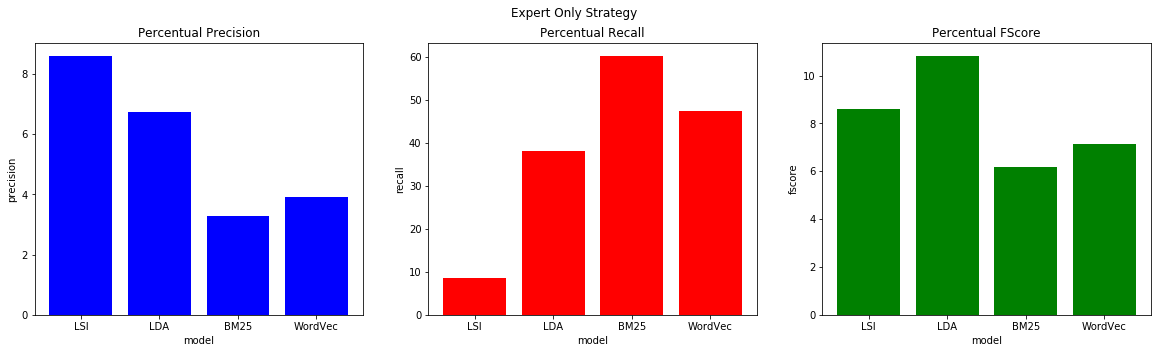

In [10]:
aux_functions.plot_results(results_3, title='Expert Only Strategy')

## Volunteers Only Strategy

In [11]:
runner_4 = Feat_BR_Runner(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)

lsi_model_4, lsi_eval_4 = runner_4.run_lsi_model()
lda_model_4, lda_eval_4 = runner_4.run_lda_model()
bm25_model_4, bm25_eval_4 = runner_4.run_bm25_model()
w2v_model_4, w2v_eval_4 = runner_4.run_word2vec_model()

Volunteers Matrix shape: (93, 21)
Features.shape: (21, 8)
SelectedBugReports.shape: (93, 18)

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------

Model Evaluation -------------------------------------------


### Results

In [12]:
results_4 = aux_functions.compile_results({'lsi_model':lsi_model_4,'lda_model':lda_model_4,'bm25_model':bm25_model_4,'w2v_model':w2v_model_4,
                                         'lsi_eval':lsi_eval_4, 'lda_eval':lda_eval_4, 'bm25_eval':bm25_eval_4, 'w2v_eval':w2v_eval_4})
results_4.head()

,model,precision,recall,fscore,precision_perc,recall_perc,fscore_perc
0,LSI_Model_Feat_BR,0.096774,0.081989,0.084827,9.677419,8.198925,8.482676
1,LDA_Model_Feat_BR,0.107719,0.480018,0.162482,10.771889,48.001792,16.248214
2,BM25_Model_Feat_BR,0.058372,0.806452,0.105196,5.837174,80.645161,10.519555
3,WordVec_Model_Feat_BR,0.067358,0.658333,0.116044,6.735769,65.833333,11.604425


### Plots

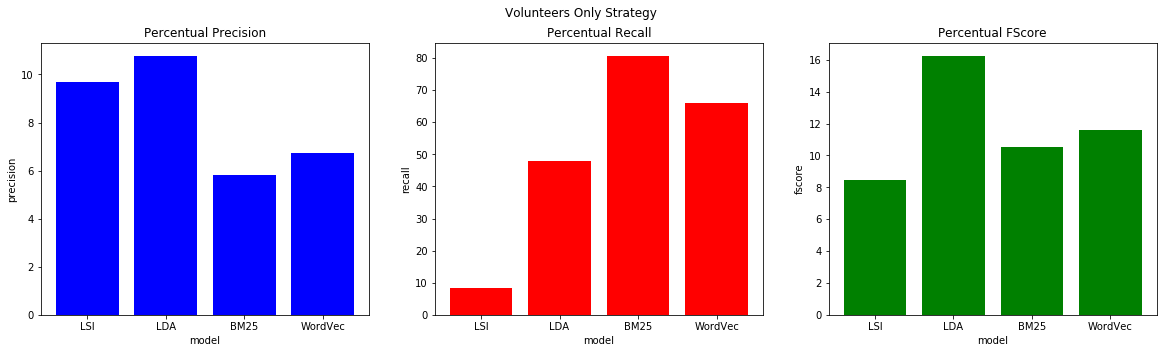

In [13]:
aux_functions.plot_results(results_4, title='Volunteers Only Strategy')